# Problem Statement

##  You're tasked with creating an automated system to estimate the annual medical expenditure for new customers. Here are few steps to takel the probelm 

### 1. First of all analyze the dataset
### 2. Do some EDA processes 
### 3. Check correlations of variable  

In [127]:
import pandas as pd

In [4]:
medical_df = pd.read_csv('insurance.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## in this dataset there are 1338 rows and 7 columns, mostly numeric columns

In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Do check is there any outliers and null data types in dataset

In [9]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Importing necessary liberaries and extentions  

In [10]:
!pip install plotly matplotlib seaborn --quiet

In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Lets do some distributions   

fig = px.histogram(medical_df, x = 'age', nbins = 40, marginal = 'box', title ='Distribution of age')
fig.update_layout(bargap =0.1)
fig.show()

### From above disribution it shows that the mostly age group belongs to 18-19 and rest are in linear format   

### BMI distributions 

In [129]:
fig = px.histogram(medical_df, x = 'bmi', marginal = 'box', color_discrete_sequence =['green'], title ='Distribution of BMI')
fig.update_layout(bargap = 0.1)
fig.show()

### This exactly looks like "Guassian Distribution" it means there is no any outliers

#### Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [19]:
fig = px.histogram(medical_df, x = 'charges', color = 'smoker', 
                   color_discrete_sequence = ['green', 'red'],
                   marginal = 'box', title ='Distribution of charges over Smoker and non-Smoker')
fig.update_layout(bargap = 0.2)
fig.show()
                   

In [20]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [22]:
fig = px.histogram(medical_df, x = 'smoker', color = 'sex', title = 'Smoker')
fig.show()

In [24]:
fig = px.scatter(medical_df, x = 'age', y ='charges', color ='smoker',
                 hover_data =['sex'],opacity =0.8, title ='Charges based on age')
fig.update_traces(marker_size = 5)
fig.show()

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

Correlation
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [26]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [30]:
numeric_smoker  = medical_df.smoker.map({'yes': 1, 'no': 0})

In [31]:
numeric_smoker

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [32]:
medical_df.charges.corr(numeric_smoker)

0.7872514304984767

In [33]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362884

Text(0.5, 1.0, 'Correlations Matrix')

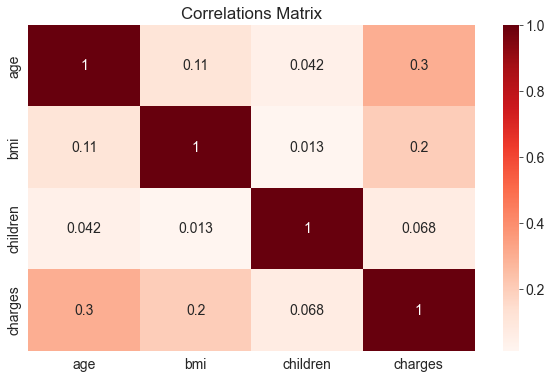

In [37]:
sns.heatmap(medical_df.corr(), cmap ='Reds', annot = True)
plt.title('Correlations Matrix')

In [39]:
non_smoker = medical_df[medical_df['smoker']  == 'no']

In [40]:
non_smoker

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


Text(0.5, 1.0, 'Age vs charges(non_smoker)')

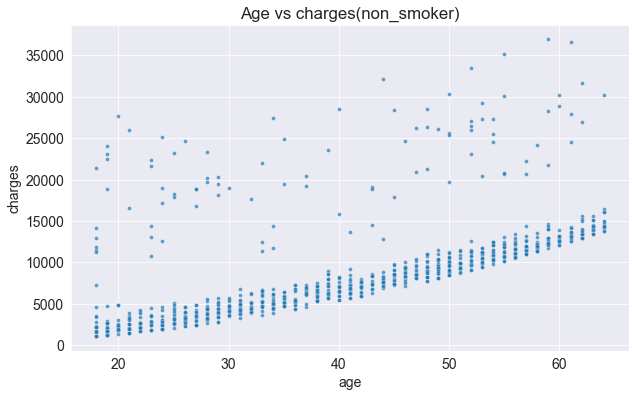

In [41]:
sns.scatterplot(data = non_smoker, x = 'age', y ='charges', alpha =0.7, s =15)
plt.title('Age vs charges(non_smoker)')

In [45]:
Smoker = medical_df[medical_df['smoker'] == 'yes']

Text(0.5, 1.0, "Smoker's age vs charges")

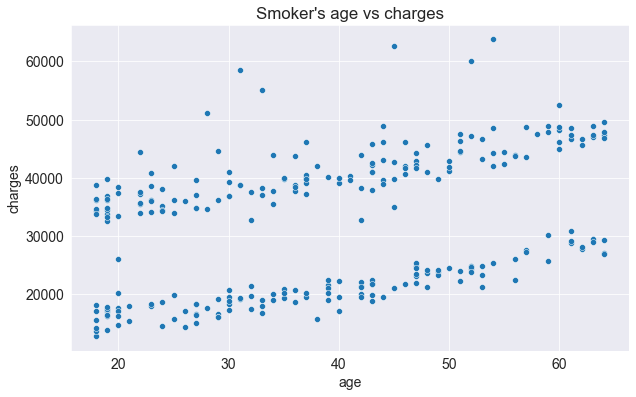

In [47]:
sns.scatterplot(data = Smoker, x = 'age', y ='charges')
plt.title("Smoker's age vs charges")

In [48]:
def estimation_of_charges(age, weight, bias):
    return weight*age + bias


In [50]:
weight = 100
bias = 50

In [51]:
ages = non_smoker.age

In [56]:
estimation_of_charges(ages, weight, bias)

1       1850
2       2850
3       3350
4       3250
5       3150
        ... 
1332    5250
1333    5050
1334    1850
1335    1850
1336    2150
Name: age, Length: 1064, dtype: int64

In [57]:
estimated_charges =  estimation_of_charges(ages, weight, bias)

Text(0, 0.5, 'Estimated charges')

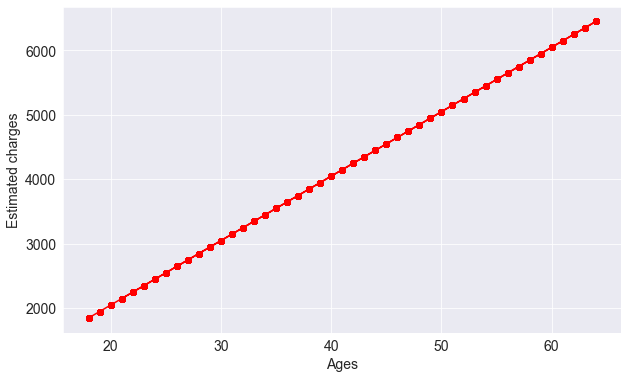

In [58]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Ages')
plt.ylabel('Estimated charges')

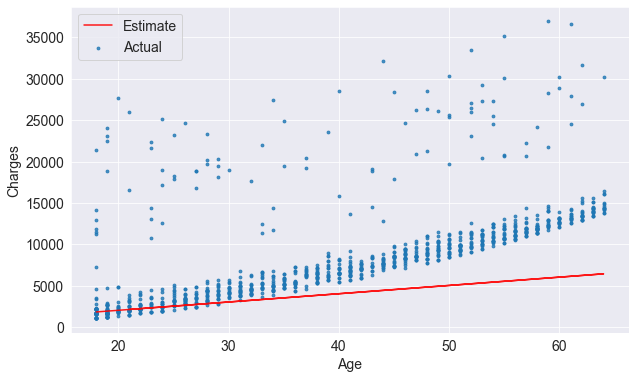

In [62]:
target = non_smoker.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [69]:
def try_parameters(weight, bias):
    ages = non_smoker.age
    target = non_smoker.charges
    estimated_charges = estimation_of_charges(ages, weight, bias)
    plt.plot(ages, estimated_charges, 'r', alpha = 0.8)
    plt.scatter(ages, target, s =8, alpha = 0.9)
    plt.xlabel('Ages')
    plt.ylabel('Estimated charges')
    plt.legend(['Estimated', 'Actual'])

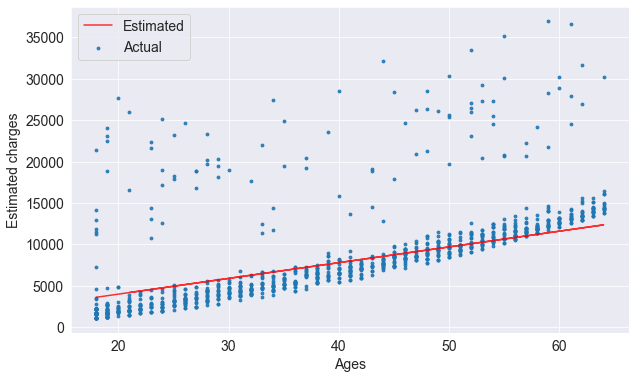

In [70]:
try_parameters(190, 200)

Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual")
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
Take the square root of the result
The result is a single number, known as the root mean squared error (RMSE). The above description can be stated mathematically as follows:




 ### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [72]:
import numpy as np 

In [73]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(predictions - targets))) 

try_parameters(200, 100)

In [75]:
targets = non_smoker.charges
predictions = estimation_of_charges(non_smoker.age, weight, bias)

In [77]:
rmse(targets, predictions)

6859.035988601682

Let's modify the try_parameters functions to also display the loss.

In [79]:
def try_parameters(weight, bias):
    ages = non_smoker.age
    target = non_smoker.charges
    estimated_charges = estimation_of_charges(ages, weight, bias)
    plt.plot(ages, estimated_charges, 'r', alpha = 0.8)
    plt.scatter(ages, target, s =8, alpha = 0.9)
    plt.xlabel('Ages')
    plt.ylabel('Estimated charges')
    plt.legend(['Estimated', 'Actual'])
    loss = rmse(target, estimated_charges)
    print('Loss:  ', loss)

Loss:   4764.58353091187


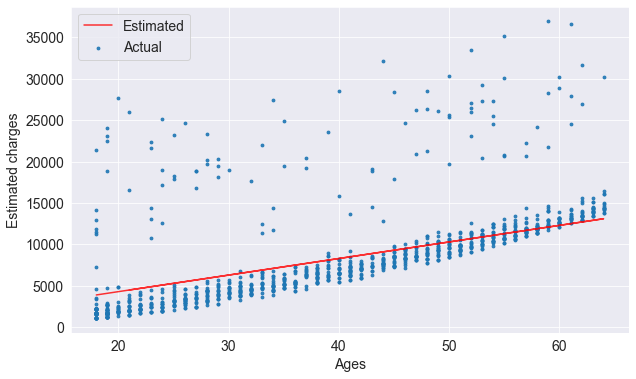

In [80]:
try_parameters(200, 300)

## LinearRegression model from sklearn 

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
model = LinearRegression()

In [86]:
inputs = non_smoker[['age']]
targets = non_smoker.charges

In [88]:
model.fit(inputs, targets)

LinearRegression()

In [89]:
predictions = model.predict(inputs)

In [90]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [91]:
rmse(targets, predictions)

4662.505766636391

In [92]:
# w
model.coef_

array([267.24891283])

In [93]:
# b
model.intercept_

-2091.4205565650827

Loss:   4662.505766636391


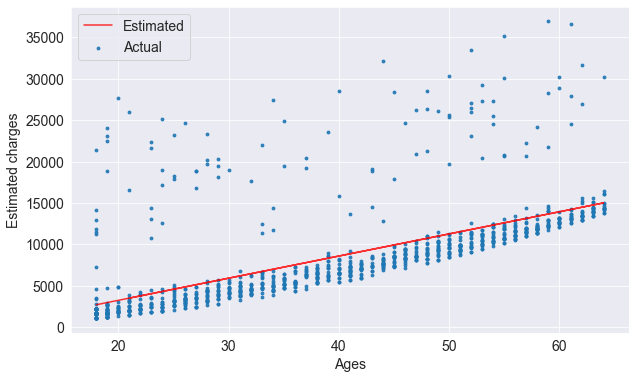

In [95]:
try_parameters(model.coef_, model.intercept_)

## This not bad prediction becuase we that there are many outliers in the dataset

### We can try throgh the different inputs by converting qualitative variable into the quantitative variables  

In [96]:
smoker_code = medical_df.smoker.map({'yes': 1, 'no': 0})

In [97]:
medical_df['smoker_code'] = smoker_code

In [98]:
sex_code = medical_df.sex.map({'male': 1, 'female': 0})

In [99]:
medical_df['sex_code'] = sex_code

In [100]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


### Now the last qualitative column is the region column, it has different values then we need to convert into quantitative through the One Hot Encoding   

In [102]:
from sklearn import preprocessing

In [103]:
encoding = preprocessing.OneHotEncoder()

In [104]:
encoding.fit(medical_df[['region']])

OneHotEncoder()

In [106]:
onehot = encoding.transform(medical_df[['region']]).toarray()

In [107]:
onehot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [108]:
medical_df.region

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [109]:
medical_df[['southwest', 'southeast', 'northwest', 'northeast']] = onehot  

In [110]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,southwest,southeast,northwest,northeast
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [111]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'southwest', 'southeast', 'northwest', 'northeast']
inputs, targets = medical_df[input_cols], medical_df.charges 

In [112]:
model = LinearRegression()

In [113]:
model.fit(inputs, targets) 

LinearRegression()

In [114]:
predictions = model.predict(inputs)

In [115]:
loss = rmse(predictions, targets) 

In [116]:
print(f'Loss: {loss}')

Loss: 6041.679651174454


## We have built train and test split model that will split the model in two phases which training and testing 

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size =0.1) 

In [119]:
model = LinearRegression()

In [120]:
model.fit(inputs_train, targets_train)

LinearRegression()

In [121]:
predictions = model.predict(inputs_test)

In [122]:
loss = rmse(targets_test, predictions)

In [123]:
print(f'Testing loss {loss}')

Testing loss 6401.261304605014


In [124]:
prediction = model.predict(inputs_train)

In [125]:
loss = rmse(prediction, targets_train)

In [126]:
print(f'Training loss {loss}')

Training loss 6003.9832937666115
